In [299]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [300]:
df = pd.read_csv("/content/drive/MyDrive/DataSet/car data.csv",)

In [301]:
df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


- We have to Predict Selling_Price.
- Here Present_Price means current Ex-Showroom Price.
- Car_Name can be removed.(Lets see)
- Change the name of selling_Price & Present_Price to(lakhs) 

In [302]:
df.shape

(301, 9)

In [303]:
##check missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [305]:
df['Car_Name'].value_counts()

city                26
corolla altis       16
verna               14
fortuner            11
brio                10
                    ..
s cross              1
Yamaha Fazer         1
omni                 1
Honda CB Trigger     1
Bajaj  ct 100        1
Name: Car_Name, Length: 98, dtype: int64

In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [307]:
df['NoofYear']=2021-df['Year']

In [308]:
df.drop(['Year'],axis=1,inplace=True)

In [309]:
df.drop(['Car_Name'],axis=1,inplace=True)

In [310]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,NoofYear
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [311]:
df.rename(columns = {'Selling_Price':'Selling_Price(lacs)','Present_Price':'Present_Price(lacs)','Owner':'Past_Owners'},inplace = True)

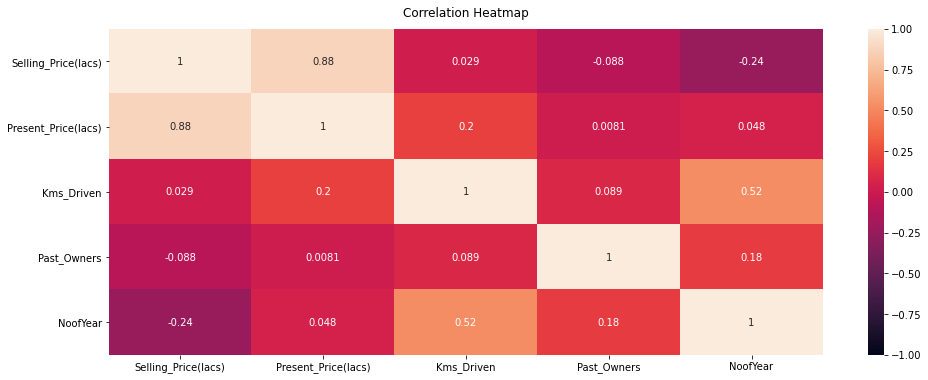

In [312]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

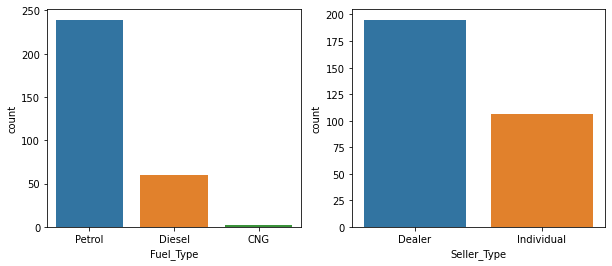

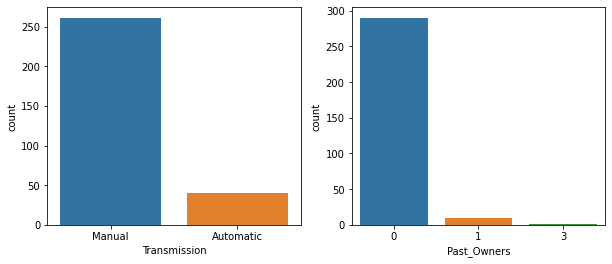

In [313]:
cat_cols = ['Fuel_Type','Seller_Type','Transmission','Past_Owners']
i=0
while i < 4:
    fig = plt.figure(figsize=[10,4])

  
    plt.subplot(1,2,1) # For layout
    sns.countplot(x=cat_cols[i], data=df)
    i += 1
    

    plt.subplot(1,2,2)
    sns.countplot(x=cat_cols[i], data=df)
    i += 1
    
    plt.show()

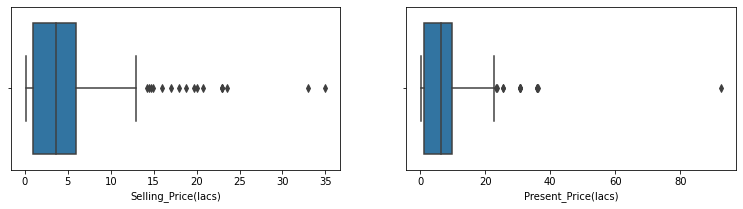

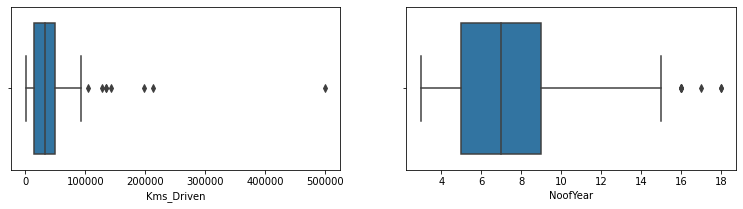

In [314]:
num_cols = ['Selling_Price(lacs)','Present_Price(lacs)','Kms_Driven','NoofYear']
i=0
while i < 4:
    fig = plt.figure(figsize=[13,3])

    

    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i], data=df)
    i += 1
    

    plt.subplot(1,2,2)
    sns.boxplot(x=num_cols[i], data=df)
    i += 1
    
    plt.show()

As you can see there are more more outliers better to remove or adjust them to Mean

In [315]:
df[df['Present_Price(lacs)'] > df['Present_Price(lacs)'].quantile(0.99)]

,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,NoofYear
64,33.0,36.23,6000,Diesel,Dealer,Automatic,0,4
86,35.0,92.60,78000,Diesel,Dealer,Manual,0,11


In [316]:
# for i in df['Present_Price(lacs)']:
df[df['Selling_Price(lacs)'] > df['Selling_Price(lacs)'].quantile(0.99)]

,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,NoofYear
63,23.5,35.96,47000,Diesel,Dealer,Automatic,0,6
64,33.0,36.23,6000,Diesel,Dealer,Automatic,0,4
86,35.0,92.60,78000,Diesel,Dealer,Manual,0,11


In [317]:
df[df['Kms_Driven'] > df['Kms_Driven'].quantile(0.99)]

,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,NoofYear
84,3.49,13.46,197176,Diesel,Dealer,Manual,0,16
179,0.31,1.05,213000,Petrol,Individual,Manual,0,11
196,0.17,0.52,500000,Petrol,Individual,Automatic,0,13


In [318]:
df[df['NoofYear'] > df['NoofYear'].quantile(0.99)]

,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,NoofYear
37,0.35,2.28,127000,Petrol,Individual,Manual,0,18
39,2.25,7.98,62000,Petrol,Dealer,Manual,0,18
77,1.50,12.35,135154,Petrol,Dealer,Automatic,0,17


In [319]:
num_cols = ['Selling_Price(lacs)','Present_Price(lacs)','Kms_Driven','NoofYear']
for i in num_cols:
  percentile25 = df[i].quantile(0.25)
  percentile75 = df[i].quantile(0.75)
  iqr =  percentile75-percentile25
  upper_limit = percentile75 + 1.5 * iqr
  lower_limit = percentile25 - 1.5 * iqr
  df = df[df[i] < upper_limit]


## Lets Check !!

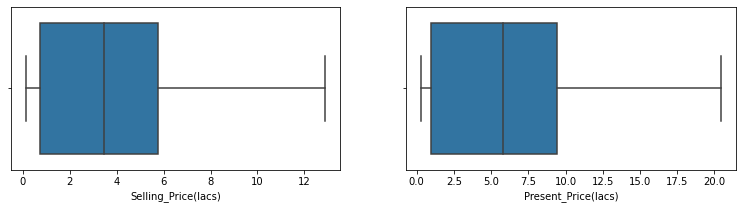

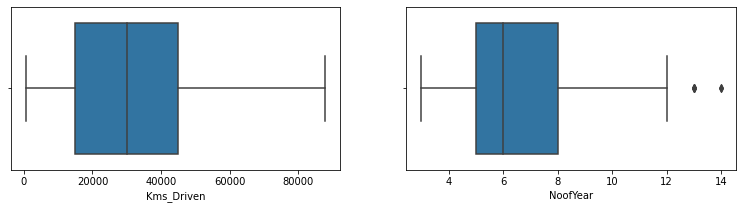

In [320]:
num_cols = ['Selling_Price(lacs)','Present_Price(lacs)','Kms_Driven','NoofYear']
i=0
while i < 4:
    fig = plt.figure(figsize=[13,3])

    

    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i], data=df)
    i += 1
    

    plt.subplot(1,2,2)
    sns.boxplot(x=num_cols[i], data=df)
    i += 1
    
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


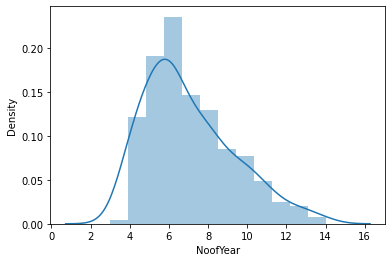

In [321]:
sns.distplot(df['NoofYear'])

In [322]:
df.describe()

,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Past_Owners,NoofYear
count,269.000000,269.000000,269.000000,269.000000,269.000000
mean,3.808178,6.001152,31136.368030,0.037175,7.026022
std,3.083474,4.808147,19906.359069,0.189542,2.317051
min,0.120000,0.320000,500.000000,0.000000,3.000000
25%,0.750000,0.990000,15000.000000,0.000000,5.000000
50%,3.450000,5.800000,30000.000000,0.000000,6.000000
75%,5.750000,9.400000,45000.000000,0.000000,8.000000
max,12.900000,20.450000,88000.000000,1.000000,14.000000


In [324]:
## Lets convert Categorical --->Numerical
Cat_le =['Fuel_Type','Seller_Type','Transmission']
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
for i in Cat_le:
  df[i]= label_encoder.fit_transform(df[i]) 

In [358]:
## Good ##
# Petrol = 2
# Diesel = 1
# CNG = 3
# ---------------#
# Dealer = 0
# individual = 1
#---------------#
# Manual = 1
# Automatic = 0
df.head()

,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,NoofYear
0,3.35,5.59,27000,2,0,1,0,7
1,4.75,9.54,43000,1,0,1,0,8
2,7.25,9.85,6900,2,0,1,0,4
3,2.85,4.15,5200,2,0,1,0,10
4,4.60,6.87,42450,1,0,1,0,7


In [326]:
print(df.columns)

Index(['Selling_Price(lacs)', 'Present_Price(lacs)', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Past_Owners', 'NoofYear'],
      dtype='object')


In [327]:
# Separating target variable and its features
y = df['Selling_Price(lacs)']
X = df.drop('Selling_Price(lacs)',axis=1)

In [328]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (180, 7)
x test:  (89, 7)
y train:  (180,)
y test:  (89,)


## Model Creation/ Evaluation

In [329]:
Model_RF = RandomForestRegressor()

In [330]:
Model_RF.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [331]:
Model_RF.score(X_train, y_train)

0.9922397369871782

In [332]:
Model_RF.score(X_test, y_test)

0.9369730452376464

In [333]:
y_hat_pred = Model_RF.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


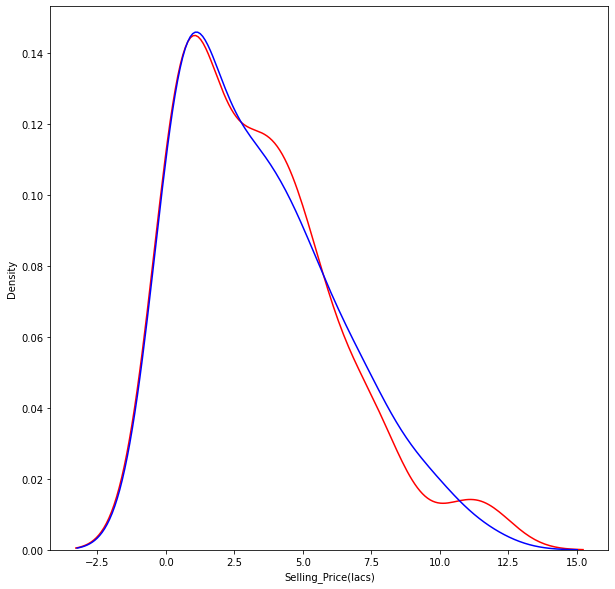

In [334]:
plt.figure(figsize=(10, 10))

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value") # hist=True
sns.distplot(y_hat_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.show()
plt.close()

In [356]:
Model_RF.predict([[7.87,24524,2,0,0,0,7]])

array([5.7535])

## Lets Set a Pipeline and Export 

In [357]:
import pickle
# open a file, where you ant to store the data
file = open('RF_Model_TW.pkl', 'wb')

# dump information to that file
pickle.dump(Model_RF, file)

In [342]:
## THE END ##